
# Summer Olympics Data Analysis Assignment

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
df = pd.read_csv("summer.csv")

In [27]:
df.describe()

,Year
count,31165.000000
mean,1970.482785
std,33.158416
min,1896.000000
25%,1948.000000
50%,1980.000000
75%,2000.000000
max,2012.000000


In [28]:
df.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [29]:
df.isnull().sum()

Year          0
City          0
Sport         0
Discipline    0
Athlete       0
Country       4
Gender        0
Event         0
Medal         0
dtype: int64

## 1. In how many cities Summer Olympics is held so far?

In [30]:
print(len(df['City'].unique()),"cities have held Summer Olympics so far!")

22 cities have held Summer Olympics so far!


## 2. Which sport is having most number of Gold Medals so far? (Top 5)

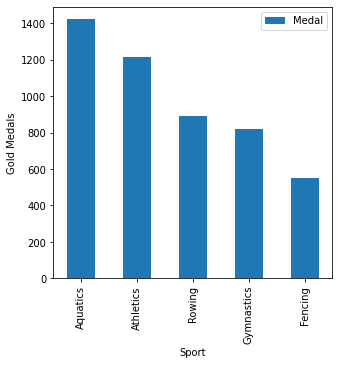

In [43]:
data = []
new_df = df[(df["Sport"] != '') & (df["Medal"] == 'Gold')][["Medal","Sport"]]
for i in df['Sport'].unique():
  sport_gold_medals = new_df[new_df["Sport"] == i]
  data.append([len(sport_gold_medals),i])

pd.DataFrame(data,columns = ['Medal','Sport']).sort_values(by='Medal', ascending=False).head().plot(x = 'Sport', xlabel = 'Sport', ylabel = 'Gold Medals', kind = 'bar', figsize = (5,5))

### 3. Which sport is having most number of medals so far? (Top 5)

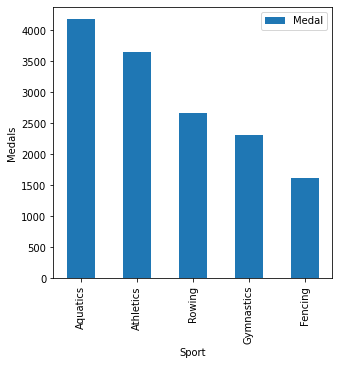

In [44]:
data = []
for medal in df['Sport'].unique():
    data.append([medal , len(df[df['Sport'] == medal])])

pd.DataFrame(data,columns = ['Sport','Medal']).sort_values(by='Medal', ascending=False).head().plot(x = 'Sport', xlabel="Sport", ylabel = 'Medals', kind = 'bar', figsize = (5,5))

## 4. Which player has won most number of medals?

In [33]:
data = []
for medal in df['Athlete'].unique():
    data.append([len(df[df['Athlete'] == medal]), medal])

data.sort(reverse=True)
print("The player who has won most number of medals is",data[0][1],".")    

The player who has won most number of medals is PHELPS, Michael .


### 5. Which player has won most number Gold Medals of medals?

In [34]:
data = []
new_df = df[(df["Medal"] == 'Gold') & (df["Athlete"] != '')][["Medal","Athlete"]]
for i in df['Athlete'].unique():
  player_gold_medals = new_df[new_df["Athlete"] == i]
  data.append([len(player_gold_medals),i])

data.sort(reverse=True)
print("The player who has won most number Gold Medals is",data[0][1],".")

The player who has won most number Gold Medals is PHELPS, Michael .


## 6. In which year India won first Gold Medal in Summer Olympics?

In [35]:
year = []
new_df = df[(df["Medal"] == 'Gold') & (df["Country"] == 'IND') & (df['Year'] != '')][["Medal","Country","Year"]]
for i in new_df['Year']:
  year.append(i)

print("In",year[0],"India won their first Gold Medal in Summer Olympics.")   

In 1928 India won their first Gold Medal in Summer Olympics.


## 7. Which event is most popular in terms on number of players? (Top 5)

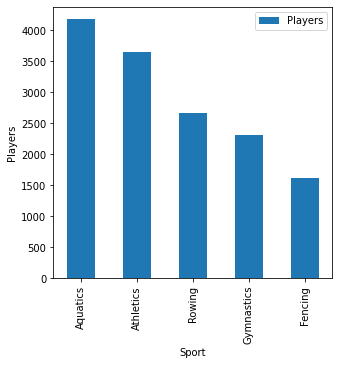

In [39]:
data = []
for sport in df['Sport'].unique():
    data.append([sport , len(df[df['Sport'] == sport])])

pd.DataFrame(data,columns = ['Sport','Players']).sort_values(by='Players', ascending=False).head().plot(x = 'Sport', xlabel = 'Sport', ylabel = 'Players', kind = 'bar', figsize = (5,5))

## 8. Which sport is having most female Gold Medalists? (Top 5)

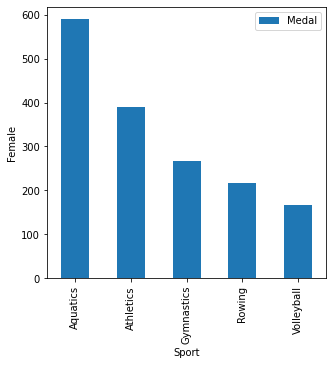

In [42]:
data = []
new_df = df[(df["Medal"] == 'Gold') & (df['Gender'] == 'Women') & (df["Sport"] != '')][["Medal","Gender","Sport"]]
for i in df['Sport'].unique():
  sport_female = new_df[new_df["Sport"] == i]
  data.append([len(sport_female),i])

pd.DataFrame(data,columns = ['Medal','Sport']).sort_values(by='Medal', ascending=False).head().plot(x = 'Sport', xlabel = 'Sport', ylabel = 'Female', kind = 'bar', figsize = (5,5))